In [1]:
''' This project is to predict whether a Student gets placed in the campus interview or not.'''

' This project is to predict whether a Student gets placed in the campus interview or not.'

# About Data


This data set consists of Placement data of students in our campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

Source: https://www.kaggle.com/benroshan/factors-affecting-campus-placement

### Attribute Information:

sl_no
Serial Number

gender
Gender- Male='M',Female='F'

ssc_p
Secondary Education percentage- 10th Grade

ssc_b
Board of Education- Central/ Others

hsc_p
Higher Secondary Education percentage- 12th Grade

hsc_b
Board of Education- Central/ Others

hsc_s
Specialization in Higher Secondary Education

degree_p
Degree Percentage

degree_t
Under Graduation(Degree type)- Field of degree education

workex
Work Experience

etest_p
Employability test percentage ( conducted by college)

specialisation
Post Graduation(MBA)- Specialization

mba_p
MBA percentage

status
Status of placement- Placed/Not placed

salary
Salary offered by corporate to candidates

# **Import Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xgboost
import lightgbm
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")
 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


# Importing the df

In [3]:
df = pd.read_csv('/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')

# Profile data

In [4]:
### Run this to Profile data

import pandas_profiling as pp


profile = pp.ProfileReport(    df, title="Campus Recruitment Profile", html={"style": {"full_width": True}}, sort=None)
profile

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Observations : salary column contains null values

# Data Cleaning

In [5]:
#Getting all the categorical columns except the target
categorical_columns = df.select_dtypes(exclude = 'number').drop('status', axis = 1).columns

print(categorical_columns)

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation'],
      dtype='object')


In [6]:
# First considering only numerical values for feature selection
X = df.iloc[:,[2,4,7,10,12,14]].values
Y = df.iloc[:,13].values

In [7]:
print(X)

[[6.700e+01 9.100e+01 5.800e+01 5.500e+01 5.880e+01 2.700e+05]
 [7.933e+01 7.833e+01 7.748e+01 8.650e+01 6.628e+01 2.000e+05]
 [6.500e+01 6.800e+01 6.400e+01 7.500e+01 5.780e+01 2.500e+05]
 ...
 [6.700e+01 6.700e+01 7.300e+01 5.900e+01 6.972e+01 2.950e+05]
 [7.400e+01 6.600e+01 5.800e+01 7.000e+01 6.023e+01 2.040e+05]
 [6.200e+01 5.800e+01 5.300e+01 8.900e+01 6.022e+01       nan]]


In [8]:
print(Y)

['Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Not Placed'
 'Not Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Placed'
 'Not Placed' 'Placed' 'Not Placed' 'Placed' 'Placed' 'Not Placed'
 'Not Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed'
 'Not Placed' 'Placed' 'Placed' 'Placed' 'Not Placed' 'Placed'
 'Not Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Not Placed'
 'Placed' 'Placed' 'Placed' 'Placed' 'Not Placed' 'Not Placed' 'Placed'
 'Placed' 'Not Placed' 'Not Placed' 'Placed' 'Placed' 'Not Placed'
 'Placed' 'Not Placed' 'Not Placed' 'Placed' 'Placed' 'Placed' 'Placed'
 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Placed' 'Not Placed'
 'Placed' 'Not Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Placed'
 'Placed' 'Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Placed'
 'Placed' 'Not Placed' 'Placed' 'Placed' 'Not Placed' 'Placed' 'Placed'
 'Placed' 'Placed' 'Not Placed' 'Placed' 'Placed' 'Placed' 'Not Placed'
 'Placed' 'Not Placed' 'Placed' 'Placed' 'Plac

In [9]:
len(df)

215

## Mean imputation for null values

In [10]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [11]:
# So salary column contains null values

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,[5]])
X[:,[5]] = imputer.transform(X[:,[5]])

In [13]:
print(X)

[[6.70000000e+01 9.10000000e+01 5.80000000e+01 5.50000000e+01
  5.88000000e+01 2.70000000e+05]
 [7.93300000e+01 7.83300000e+01 7.74800000e+01 8.65000000e+01
  6.62800000e+01 2.00000000e+05]
 [6.50000000e+01 6.80000000e+01 6.40000000e+01 7.50000000e+01
  5.78000000e+01 2.50000000e+05]
 ...
 [6.70000000e+01 6.70000000e+01 7.30000000e+01 5.90000000e+01
  6.97200000e+01 2.95000000e+05]
 [7.40000000e+01 6.60000000e+01 5.80000000e+01 7.00000000e+01
  6.02300000e+01 2.04000000e+05]
 [6.20000000e+01 5.80000000e+01 5.30000000e+01 8.90000000e+01
  6.02200000e+01 2.88655405e+05]]


# Feature Selection of Numerical Values - ExtraTreesClassifier

[0.27492759 0.15935258 0.15791817 0.04914153 0.08096193 0.27769821]


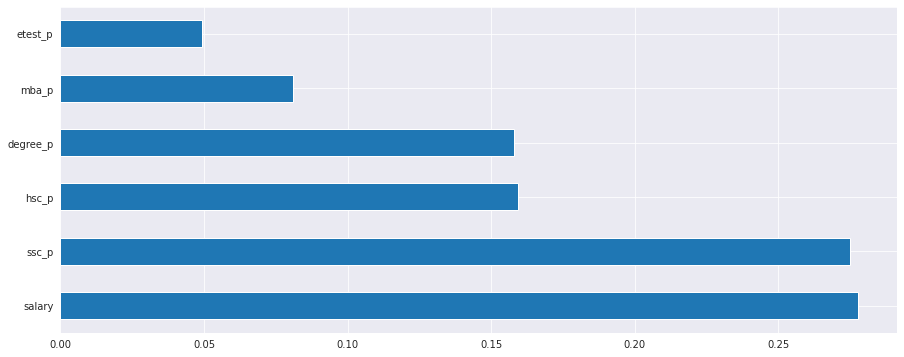

In [14]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = df.iloc[:,[2,4,7,10,12,14]]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [15]:
# So we can conclude that 'Salary' and 'ssc_p' are two relavent features for predicting the status of placement for a student

# Feature Selection of Categorical Data - chi2_contingency

In [16]:
# Import the function
#from scipy.stats import chi2_contingency
#Testing the relationship
#chi_res = chi2_contingency(pd.crosstab(df['status'], df['gender']))
#print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

In [17]:
from scipy.stats import chi2_contingency
chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(df['status'], df[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical_columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

           Column                      Hypothesis
0          gender  Fail to Reject Null Hypothesis
1           ssc_b  Fail to Reject Null Hypothesis
2           hsc_b  Fail to Reject Null Hypothesis
3           hsc_s  Fail to Reject Null Hypothesis
4        degree_t  Fail to Reject Null Hypothesis
5          workex          Reject Null Hypothesis
6  specialisation          Reject Null Hypothesis


In [18]:
# If we choose our p-value level to 0.05, if the p-value test result is more than 0.05 then we fail to reject the Null Hypothesis. 
# This means, there is no relationship between the Feature and Dependent Variable based on the Chi-Square test of independence.
# And if the p-value test result is less than 0.05 then we reject the Null Hypothesis. 
# This means, there is a relationship between the Feature and Dependent Variable based on the Chi-Square test of independence.

So we conclude that 'workex' and 'specialisation' are two important features for predicting status.

In [19]:
# So after feature selection of categorical and numerical features, X comes as,
X = df.iloc[:,[2,9,11,14]].values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,[3]])
X[:,[3]] = imputer.transform(X[:,[3]])

# Encoding Categorical Values

#### Finding the categories

In [20]:
print(df['workex'].unique())
print(df['specialisation'].unique())
print(df['status'].unique())

['No' 'Yes']
['Mkt&HR' 'Mkt&Fin']
['Placed' 'Not Placed']


### Label encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,1] = le1.fit_transform(X[:, 1])
le2 = LabelEncoder()
X[:,2] = le2.fit_transform(X[:, 2])
le3 = LabelEncoder()
Y = le3.fit_transform(Y)

In [22]:
print(X[0])

[67.0 0 1 270000.0]


In [23]:
print(Y)

[1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0
 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0
 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0]


# Splitting the df into training set and test set

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

# Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,[0,3]] = sc.fit_transform(X_train[:,[0,3]])
X_test[:,[0,3]] = sc.transform(X_test[:,[0,3]])

# Applying classification models on the Training set

Confusion matrix of  CatBoostClassifier
[[15  0]
 [ 0 28]]
Accuracy score is  1.0
Confusion matrix of  Logistic Regression
[[ 7  8]
 [ 3 25]]
Accuracy score is  0.7441860465116279
Confusion matrix of  Support Vector Machine
[[ 9  6]
 [ 3 25]]
Accuracy score is  0.7906976744186046
Confusion matrix of  Decision Tree
[[15  0]
 [ 0 28]]
Accuracy score is  1.0
Confusion matrix of  Neural Network
[[ 9  6]
 [ 4 24]]
Accuracy score is  0.7674418604651163
Confusion matrix of  Random Forest
[[15  0]
 [ 0 28]]
Accuracy score is  1.0
[17:17:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion matrix of  XGBoost
[[15  0]
 [ 0 28]]
Accuracy score is  1.0
Confusion matrix of  LGBMClassifier
[[15  0]
 [ 0 28]]
Accuracy score is  1.0
[17:17:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, 

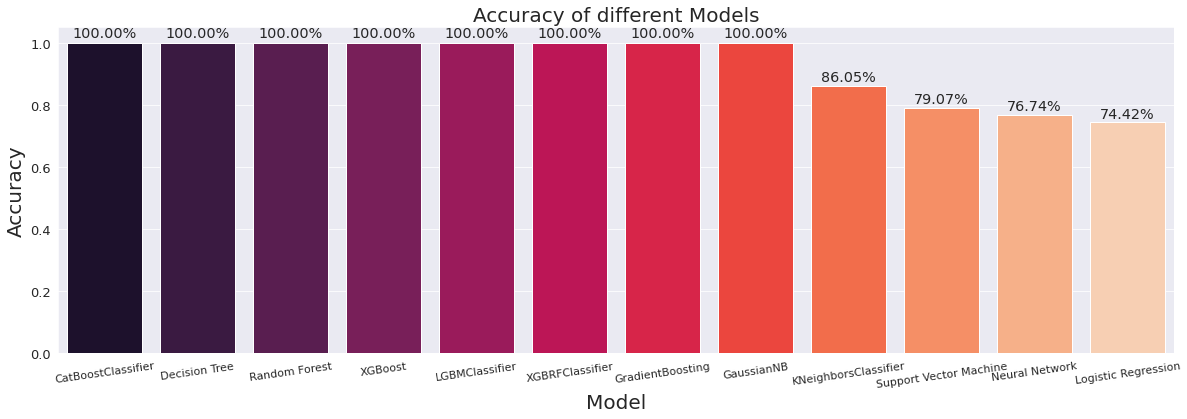

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm
import xgboost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

names = [
    "CatBoostClassifier",
    "Logistic Regression",
    "Support Vector Machine",
    "Decision Tree",
    "Neural Network",
    "Random Forest",
    "XGBoost",
    "LGBMClassifier",
    "XGBRFClassifier",
    "GradientBoosting",
    "GaussianNB",
    "KNeighborsClassifier"
]
models = [
    CatBoostClassifier(verbose= False),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    MLPClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    lightgbm.LGBMClassifier(max_depth=2, random_state=4),
    xgboost.XGBRFClassifier(max_depth=3, random_state=1),
    GradientBoostingClassifier(max_depth=2, random_state=1),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
]

accuracy=[]
for model, name in zip(models,names):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('Confusion matrix of ',name)
    print(confusion_matrix(y_test, y_pred))
    ac = accuracy_score(y_test, y_pred)
    print('Accuracy score is ',ac)
    accuracy.append(ac)
    print('='*50)

Accuracy_list = pd.DataFrame(list(zip(names, accuracy)),columns =['Model', 'Accuracy'])
Accuracy_list= Accuracy_list.sort_values('Accuracy', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=True, key=None)

plt.rcParams['figure.figsize']=20,6 
sns.set_style("darkgrid")
ax = sns.barplot(x = 'Model',y = 'Accuracy',data = Accuracy_list , palette = "rocket", saturation =1.5)
plt.xlabel("Model", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

 # Please let me know in the comments what improvements can be done 